In [ ]:
import pandas as pd
import yfinance as yf
import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from dateutil.relativedelta import relativedelta
import FundamentalAnalysis as fa
FA_API_Key = "Your_API_Key_Here"
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import requests
params = {'legend.fontsize': 'medium',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams['xtick.labelsize']=2
plt.rcParams['ytick.labelsize']=2
plt.rcParams.update(params)

#### FinancialModelingPrep

In [ ]:
#Current Period only ratios
def GetMkt_RecentData(company,demo=FA_API_Key):
    fin_ratios = requests.get(f'https://financialmodelingprep.com/api/v3/key-metrics-ttm/{company}?apikey={demo}').json()
    fin_ratios = pd.DataFrame(fin_ratios,index=[company])
    fin_ratios = fin_ratios.T
    return fin_ratios

In [ ]:
#Sample of current ratios
Mkt = 'AAPL'
MktData = GetMkt_RecentData(Mkt,demo=FA_API_Key)
MktData

,AAPL
revenuePerShareTTM,23.080123
netIncomePerShareTTM,6.134498
operatingCashFlowPerShareTTM,6.847419
freeCashFlowPerShareTTM,6.213684
cashPerShareTTM,3.899102
bookValuePerShareTTM,4.388312
tangibleBookValuePerShareTTM,4.388312
shareholdersEquityPerShareTTM,4.388312
interestDebtPerShareTTM,7.656242
marketCapTTM,2689398352542


In [ ]:
#SnapShot of all the Nasdaq Mkts
AllMktsSnapShot = pickle.load(open('AllMktsSnapShot.pkl','rb'))
AllMktsSnapShot.tail()

,revenuePerShareTTM,netIncomePerShareTTM,operatingCashFlowPerShareTTM,freeCashFlowPerShareTTM,cashPerShareTTM,bookValuePerShareTTM,tangibleBookValuePerShareTTM,shareholdersEquityPerShareTTM,interestDebtPerShareTTM,marketCapTTM,...,averagePayablesTTM,averageInventoryTTM,daysSalesOutstandingTTM,daysPayablesOutstandingTTM,daysOfInventoryOnHandTTM,receivablesTurnoverTTM,payablesTurnoverTTM,inventoryTurnoverTTM,roeTTM,capexPerShareTTM
WBA,163.305251,-0.804385,1.642239,1.275245,1.282170,23.936526,90.549336,23.936526,19.102135,4.269246e+10,...,15335000000,10315500000,5.004876,12.842771,8.856537,17.982463,7.007834,10.161986,-0.033605,-0.366994
WDAY,17.485628,-1.422681,1.248069,1.045304,4.482242,12.929795,31.785650,12.929795,11.138277,6.289281e+10,...,56356500,None,16.058901,4.227341,0.000000,5.604368,21.289978,None,-0.110031,-0.202765
XEL,21.629278,2.807985,1.342205,-0.952471,1.682510,26.192015,102.106464,26.192015,39.389734,3.344834e+10,...,1395000000,499500000,11.747385,22.315431,7.132023,7.661279,4.033084,12.619141,0.107208,-2.294677
XLNX,12.531839,2.548756,1.417685,1.285055,4.620512,10.668595,22.851840,10.668595,8.557458,3.319808e+10,...,108048000,291077500,7.948310,8.316034,22.672723,11.323162,10.822467,3.969528,0.238903,-0.132630
ZM,6.872369,1.499545,0.128357,0.092916,2.565132,5.266880,10.677558,5.266880,4.008052,1.110597e+11,...,12640500,None,12.917174,1.941143,0.000000,6.967468,46.364440,None,0.284712,-0.035441


In [ ]:
#Function to the plot the distribution of a factor
def DescribeRatio(SnapShot,Factor,Filter=True):
    FactorData = SnapShot[Factor].copy()
    if Filter:
        ExtremeQuantiles = np.nanquantile(FactorData,[0.1,0.90])
        FactorData = FactorData.loc[(FactorData>ExtremeQuantiles[0])&(FactorData<ExtremeQuantiles[1])]
    print(FactorData.describe())
    FactorData.plot(kind='hist')
    plt.title('Distribution of the Factor: {}'.format(Factor))
    plt.show()

count      101.000000
mean      -174.386925
std       2281.526183
min     -22816.574957
25%         19.158335
50%         30.641464
75%         61.089898
max       1432.447176
Name: peRatioTTM, dtype: float64


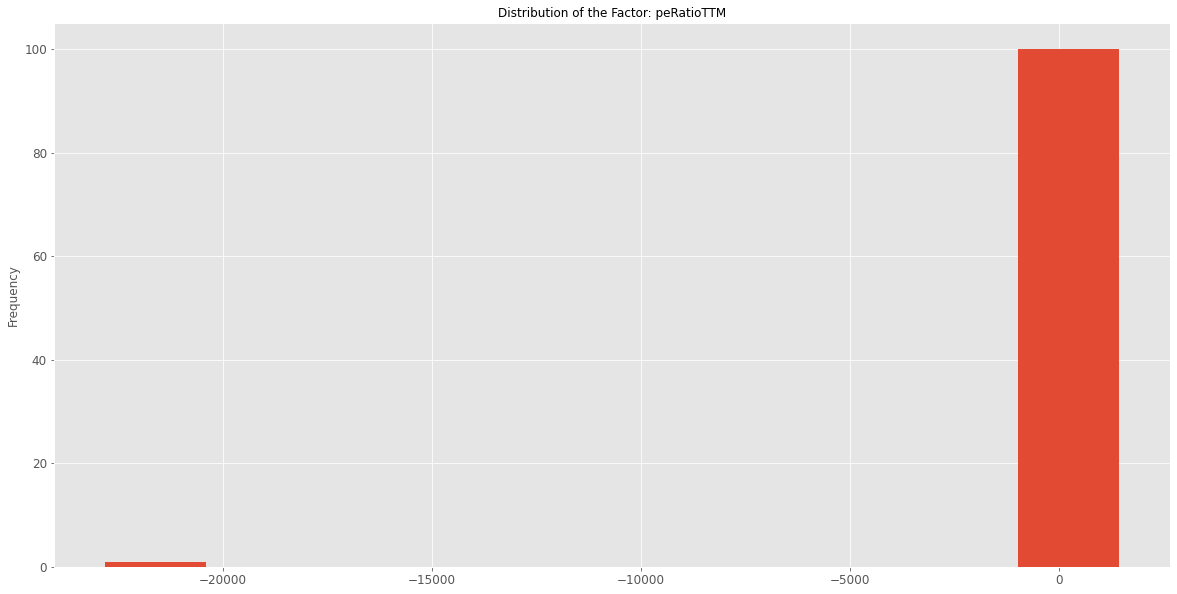

In [ ]:
#Without handling the data discrapency
DescribeRatio(AllMktsSnapShot,'peRatioTTM',False)

count    79.000000
mean     36.265550
std      24.005009
min     -22.766406
25%      21.813264
50%      30.641464
75%      45.328105
max      98.761881
Name: peRatioTTM, dtype: float64


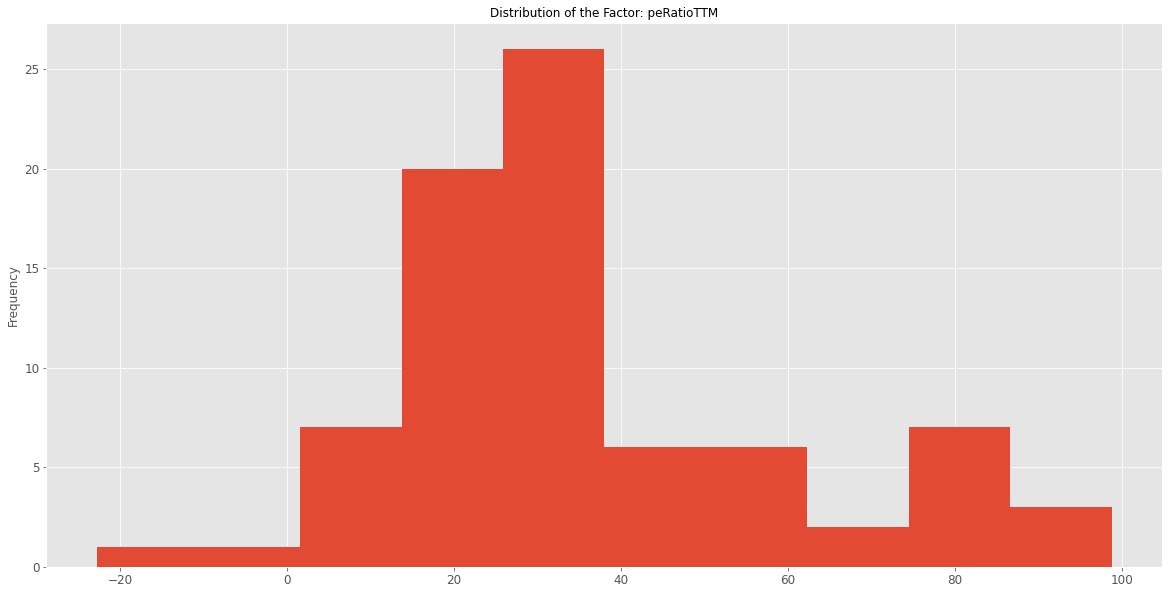

In [ ]:
#After adjustment
DescribeRatio(AllMktsSnapShot,'peRatioTTM',True)

In [ ]:
#Get FMP historic data
def GetMkt_FundamentalData_FMP(Mkt,FactorsList = None):
    Mkt_Qtly_FundamentalData = fa.key_metrics(Mkt, FA_API_Key, period="quarter")
    Mkt_Qtly_FundamentalData = Mkt_Qtly_FundamentalData.T
    Mkt_Qtly_FundamentalData.reset_index(inplace=True)
    Mkt_Qtly_FundamentalData['index'] = Mkt_Qtly_FundamentalData['index'].astype('datetime64[ns]')
    Mkt_Qtly_FundamentalData.sort_values('index',ascending=True,inplace=True)
    Mkt_Qtly_FundamentalData['index'] = [date + pd.tseries.offsets.QuarterEnd() for date in  Mkt_Qtly_FundamentalData['index']]
    Mkt_Qtly_FundamentalData = Mkt_Qtly_FundamentalData.loc[~Mkt_Qtly_FundamentalData['index'].duplicated(keep='last'),:]
    Mkt_Qtly_FundamentalData.set_index('index',inplace=True)
    if FactorsList is not None:
        Mkt_Qtly_FundamentalData = Mkt_Qtly_FundamentalData[FactorsList]
    return Mkt_Qtly_FundamentalData

In [ ]:
#To Get Information of all factors at once
Mkt = 'AAPL'
MktFundamentalData = GetMkt_FundamentalData_FMP(Mkt)
MktFundamentalData.tail()

,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-31,Q1,6.580349,1.697951,2.288912,2.082241,4.53649,3.910454,3.910454,3.910454,6.653688,2314861449980.237793,2390894449980.237793,20.12573,20.772454,59.718325,65.645619,34.955023,34.955023,21.454737,64.823752,61.679809,67.801788,0.012422,0.015233,1.499169,0.812955,2.061465,1.163003,52.561129,1.348044,0.001561,0.125648,0.0,0.04633,0.0,-0.090292,-0.031407,-1.312828,0.018127,12.222707,0.151363,0.081216,-9.716643,21599000000,None,-133724000000,1.691879,55063000000,59304500000,5776500000,47.342492,85.621433,6.6691,1.901041,1.051139,13.495073,0.434208,-0.206671
2021-03-31,Q2,5.347189,1.410454,1.431404,1.29597,4.168329,4.129173,4.129173,4.129173,7.300873,2030688809206.523926,2113867809206.523926,21.484224,22.667985,84.679071,93.528409,29.354546,29.354546,23.596488,67.153816,88.147609,97.359424,0.011636,0.010692,1.57047,0.79482,2.642449,1.141749,41.049254,1.014854,0.001697,0.145874,0.0,0.058738,0.0,-0.094617,-0.025328,-0.811226,0.022113,11.447277,0.119178,0.070086,-10.192482,15080000000,None,-146515000000,1.758435,42271000000,47445000000,5899500000,33.189409,70.118047,9.119697,2.711708,1.28355,9.868749,0.341583,-0.135435
2021-06-30,Q3,4.896998,1.307566,1.268479,1.142617,3.710062,3.86545,3.86545,3.86545,7.363838,2213535590439.371094,2301276590439.371094,25.449958,27.181958,104.93674,116.495742,34.435837,34.435837,28.259408,82.583672,109.096264,121.113446,0.009823,0.008584,1.645177,0.805118,3.148676,1.061891,36.279699,0.970107,0.001702,0.173243,0.0,0.070204,0.0,-0.099223,-0.025702,-0.739054,0.024069,10.664073,0.108634,0.065923,-10.574303,6669000000,None,-151137000000,1.894695,42707000000,47586000000,5879000000,37.474765,78.754629,10.0916,2.401616,1.14279,8.918308,0.33827,-0.125862
2021-09-30,Q4,5.056068,1.246488,1.225199,1.029713,3.799269,3.826623,3.826623,3.826623,7.605391,2422287784345.757812,2512066784345.757812,29.466787,29.058155,119.915237,142.680555,38.394164,38.394164,30.135158,93.354149,124.359742,147.968827,0.008484,0.007009,1.729371,0.820257,3.336393,1.074553,35.395833,0.982921,0.001503,0.17712,0.0,0.069242,0.0,-0.159554,-0.038664,-1.078287,0.023333,10.359605,0.105471,0.05855,-11.121014,9355000000,None,-153076000000,1.976843,51506000000,54763000000,6580000000,55.608685,102.284273,12.289877,1.618452,0.879901,7.3231,0.325741,-0.195486
2021-12-31,Q1,7.561438,2.112651,2.865226,2.694225,3.899102,4.388312,4.388312,4.388312,7.533802,2955919621703.448242,3041598621703.448242,21.339298,23.848639,62.937436,66.932039,41.093249,41.093249,24.539906,68.148383,64.761713,68.872102,0.011715,0.014941,1.482358,0.811297,1.919676,1.037812,59.78098,1.356223,0.001263,0.107768,0.0,0.050877,0.0,-0.059681,-0.022615,-1.039303,0.018274,14.442885,0.17759,0.090847,-11.802801,5580000000,None,-156105000000,1.70714,58379500000,64562500000,6228000000,47.382065,96.017044,7.587157,1.899453,0.937334,11.862151,0.481427,-0.171001


In [ ]:
#List of all factors available
MktFundamentalData.columns

Index(['period', 'revenuePerShare', 'netIncomePerShare',
       'operatingCashFlowPerShare', 'freeCashFlowPerShare', 'cashPerShare',
       'bookValuePerShare', 'tangibleBookValuePerShare',
       'shareholdersEquityPerShare', 'interestDebtPerShare', 'marketCap',
       'enterpriseValue', 'peRatio', 'priceToSalesRatio', 'pocfratio',
       'pfcfRatio', 'pbRatio', 'ptbRatio', 'evToSales',
       'enterpriseValueOverEBITDA', 'evToOperatingCashFlow',
       'evToFreeCashFlow', 'earningsYield', 'freeCashFlowYield',
       'debtToEquity', 'debtToAssets', 'netDebtToEBITDA', 'currentRatio',
       'interestCoverage', 'incomeQuality', 'dividendYield', 'payoutRatio',
       'salesGeneralAndAdministrativeToRevenue',
       'researchAndDdevelopementToRevenue', 'intangiblesToTotalAssets',
       'capexToOperatingCashFlow', 'capexToRevenue', 'capexToDepreciation',
       'stockBasedCompensationToRevenue', 'grahamNumber', 'roic',
       'returnOnTangibleAssets', 'grahamNetNet', 'workingCapital',
   

In [ ]:
#To get specific factors info
MktFundamentalData = GetMkt_FundamentalData_FMP(Mkt,['peRatio'])
MktFundamentalData.tail()

,peRatio
index,
2020-12-31,20.12573
2021-03-31,21.484224
2021-06-30,25.449958
2021-09-30,29.466787
2021-12-31,21.339298


In [ ]:
import os
os.path.join('Nasdaq_20220223','AllMkts_FactorsData_new.pkl')

'Nasdaq_20220223\\AllMkts_FactorsData_new.pkl'

In [ ]:
#All Mkts all factor data
#AllMkts_FactorsData = pickle.load(open('AllMkts_FactorsData_new.pkl','rb'))
AllMkts_FactorsData = pickle.load(open(os.path.join('Nasdaq_20220223','AllMktsAllFactorData.pkl'),'rb'))

In [ ]:
def PlotMktFactors(AllMkts_FactorsData,Mkt='AAPL',StartDate='2006',Factor='peRatio'):
    MktData = AllMkts_FactorsData[Mkt].copy()
    MktData = MktData.loc[StartDate:,[Factor]]
    MktData.plot()
    plt.title('Mkt: {}, Factor: {}'.format(Mkt,Factor))
    plt.show()

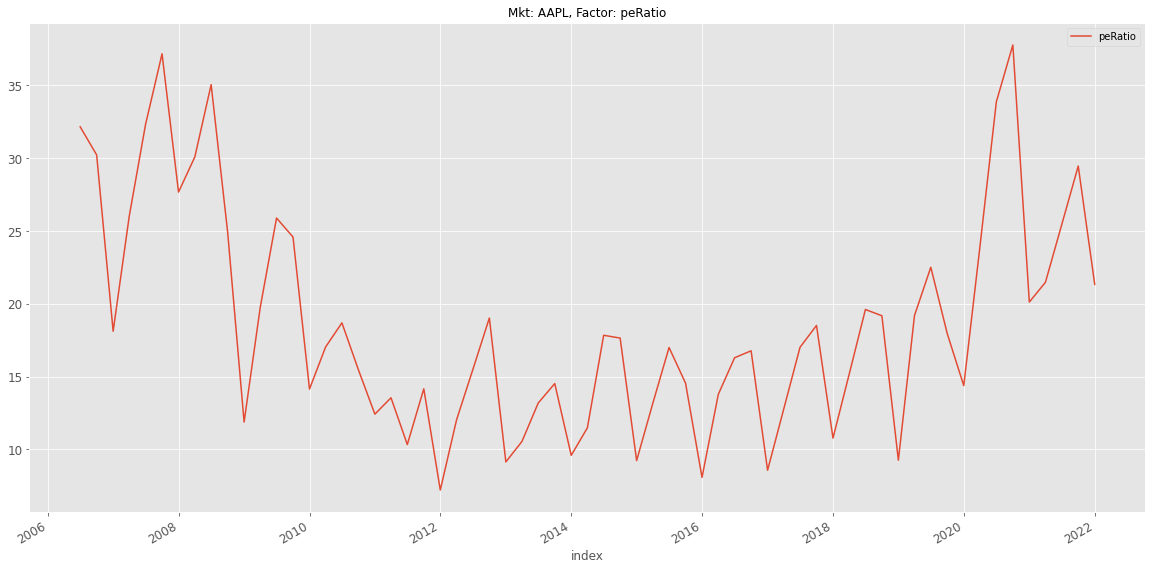

In [ ]:
PlotMktFactors(AllMkts_FactorsData,Mkt='AAPL',StartDate='2006',Factor='peRatio')

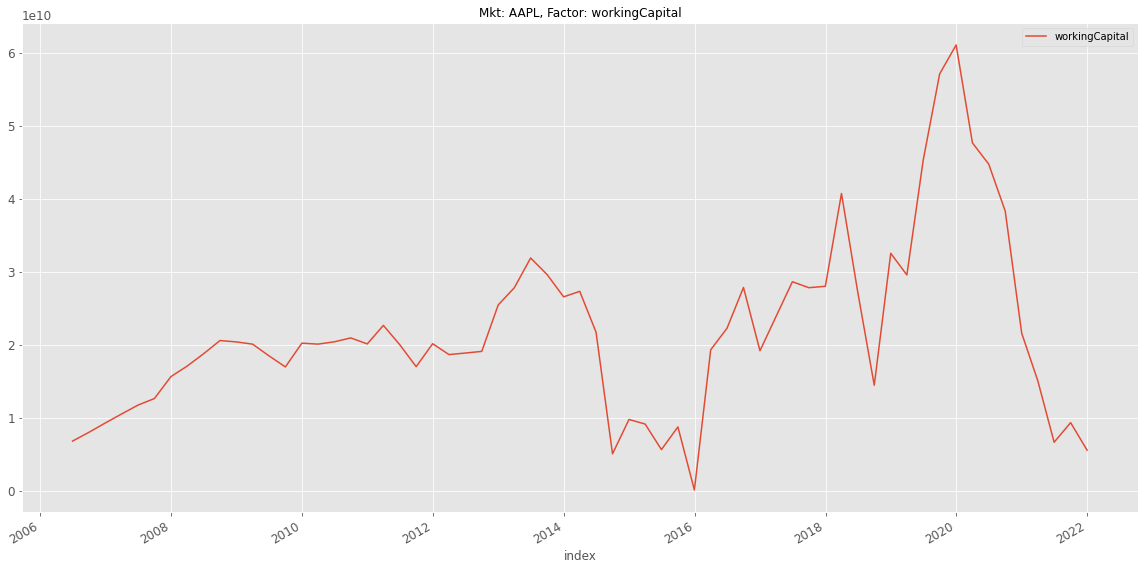

In [ ]:
#Stationarizing by MCap
PlotMktFactors(AllMkts_FactorsData,Mkt='AAPL',StartDate='2006',Factor='workingCapital')

In [ ]:
def StationarizeByMCap(AllMkts_FactorsData,Mkt='AAPL',StartDate='2006',Factor='workingCapital'):
    MktData = AllMkts_FactorsData[Mkt].copy()
    MktData = MktData.loc[StartDate:,[Factor,'marketCap']]
    MktData[Factor] = MktData[Factor] / MktData['marketCap']
    MktData = MktData[[Factor]]
    MktData.plot()
    plt.title('Mkt: {}, Factor: {}, Stationarized By MCap'.format(Mkt,Factor))
    plt.show()

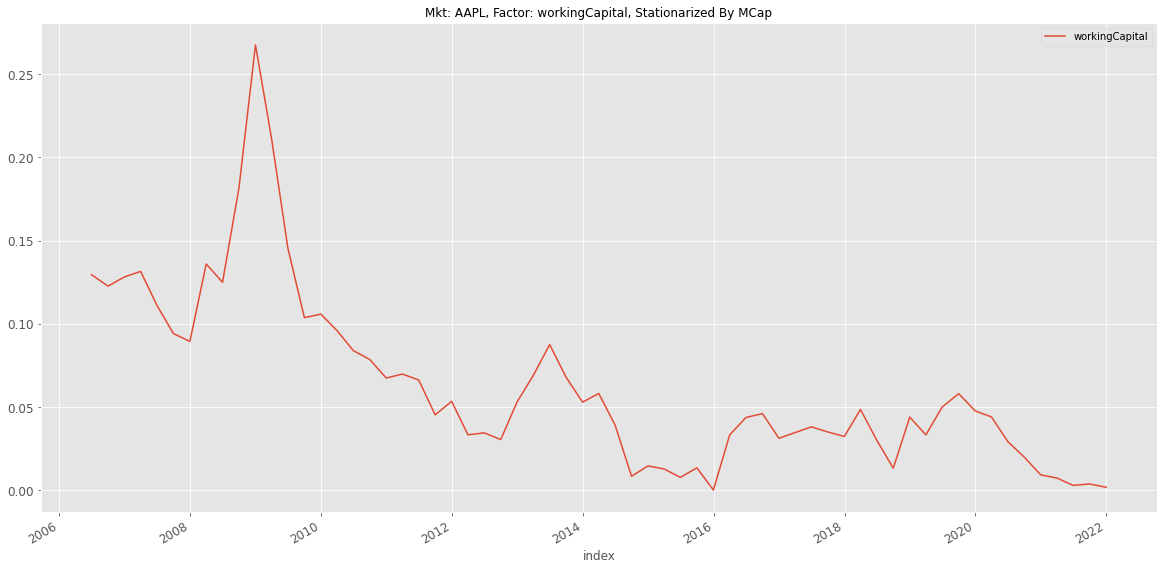

In [ ]:
StationarizeByMCap(AllMkts_FactorsData,Mkt='AAPL',StartDate='2006',Factor='workingCapital')

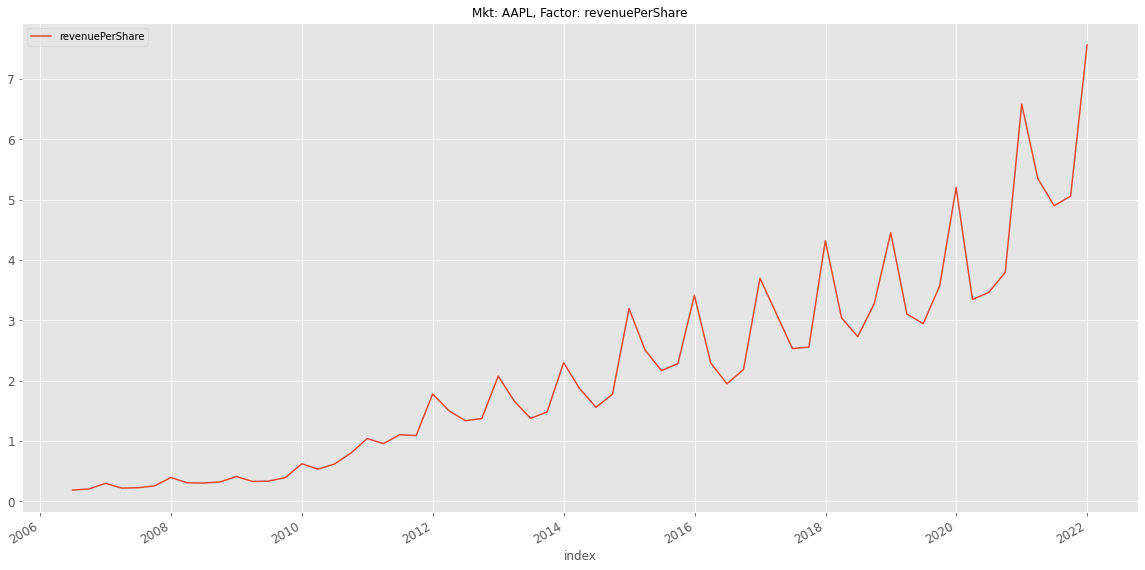

In [ ]:
#Stationarizing by Price
PlotMktFactors(AllMkts_FactorsData,Mkt='AAPL',StartDate='2006',Factor='revenuePerShare')

In [ ]:
def StationarizeByPrice(AllMkts_FactorsData,Mkt='AAPL',StartDate='2006',Factor='revenuePerShare'):
    MktData = AllMkts_FactorsData[Mkt].copy()
    MktData = MktData.loc[StartDate:,[Factor]]

    MktPrices = yf.download(Mkt,progress=False)
    MktPrices = pd.concat([MktPrices,MktData[[]]],axis=1)
    MktPrices = MktPrices.fillna(method='ffill')
    MktPrices = MktPrices.loc[MktData.index,:]

    MktData = pd.concat([MktData,MktPrices[['Close']]],axis=1)
    MktData[Factor] = MktData[Factor] / MktData['Close']
    MktData = MktData[[Factor]]
    MktData.plot()
    plt.title('Mkt: {}, Factor: {}, Stationarized By Price'.format(Mkt,Factor))
    plt.show()

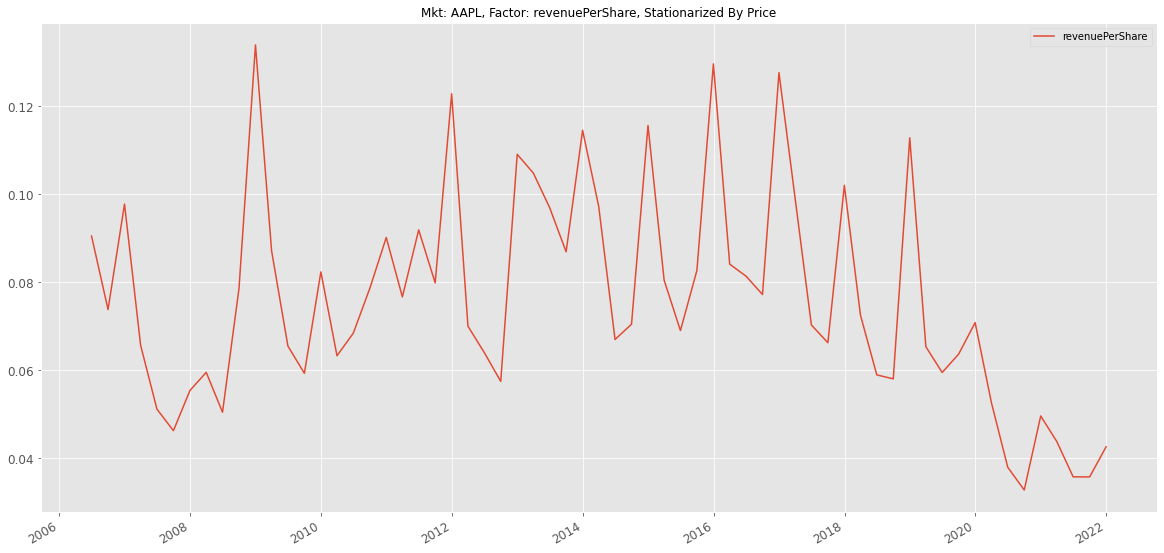

In [ ]:
StationarizeByPrice(AllMkts_FactorsData,Mkt='AAPL',StartDate='2006',Factor='revenuePerShare')

#### Target Creation

In [ ]:
def PlotTargetData(AllMktsAllFactorData,Mkt='AAPL',BenchMarkMkt = '^IXIC',ReturnPeriod = 1,ExcessRetThresh = 0.1):
    MktFactorData = AllMktsAllFactorData[Mkt].copy()
    MktPrices = yf.download(Mkt,progress=False)
    BenchMark_Prices = yf.download(BenchMarkMkt,progress=False)
    BenchmarkReturnList = []
    MktActualReturnsList = []
    for Date in MktFactorData.index:
        StartDate = Date
        EndDate = StartDate + relativedelta(years=ReturnPeriod)
        PeriodPrices = MktPrices.loc[StartDate:EndDate,'Adj Close'].copy()

        BenchmarkReturns = np.nan
        ActualReturns = np.nan
        if (EndDate <= MktPrices.index.max()) & (not PeriodPrices.empty):
            PeriodReturns = (PeriodPrices.iloc[-1] / PeriodPrices.iloc[0]) - 1
            ActualReturns = PeriodReturns

            BenchmarkPeriodPrices = BenchMark_Prices.loc[StartDate:EndDate,'Adj Close'].copy()
            BenchmarkReturns = (BenchmarkPeriodPrices.iloc[-1] / BenchmarkPeriodPrices.iloc[0]) - 1

        BenchmarkReturnList.append(BenchmarkReturns)
        MktActualReturnsList.append(ActualReturns)

    MktReturnsInfo = pd.DataFrame({'MktReturns':MktActualReturnsList,
                                   'BenchMarkReturns':BenchmarkReturnList},
                                  index=MktFactorData.index)

    MktReturnsInfo.loc['2006':,:].plot()
    plt.title('Actual Returns\nMkt: {}, BenchMark: {}, RetPeriod: {}Yr'.format(Mkt,BenchMarkMkt,ReturnPeriod))
    plt.show()

    MktReturnsInfo['ExcessReturns'] = MktReturnsInfo['MktReturns'] - MktReturnsInfo['BenchMarkReturns']

    MktReturnsInfo.loc['2006':,'ExcessReturns'].plot()
    plt.axhline(ExcessRetThresh,color='green')
    plt.legend(['ExcessReturns','ExcessRetThresh'])
    plt.title('ExcessReturns, ExcessretThresh: {}\nMkt: {}, BenchMark: {}, RetPeriod: {}Yr'.format(ExcessRetThresh,Mkt,BenchMarkMkt,ReturnPeriod))
    plt.show()

    MktReturnsInfo['Signal'] = 0
    MktReturnsInfo.loc[MktReturnsInfo['ExcessReturns']>ExcessRetThresh,'Signal'] = 1

    PricePlot = MktPrices.copy()
    PricePlot = pd.concat([PricePlot,MktReturnsInfo[['Signal']]],axis=1)
    PricePlot = PricePlot.fillna(method='ffill')
    PricePlot = PricePlot.loc['2006':,:]

    MinPrice = PricePlot['Adj Close'].min() * 0.95
    MaxPrice = PricePlot['Adj Close'].max() * 1.05

    PricePlot['Adj Close'].plot()
    PricePlot['Signal'].replace({0:np.nan,1:MaxPrice}).plot(kind='area',color='green',alpha=0.25)
    plt.title('Prices & ExcessRet Based signals\nMkt: {}, BenchMark: {}, ExcessretThresh: {}, RetPriod: {}Yr'.format(Mkt,BenchMarkMkt,ExcessRetThresh,ReturnPeriod))
    plt.ylim(MinPrice, MaxPrice)
    plt.show()
    print('Distribution of the Signals:')
    print(MktReturnsInfo.loc['2006':,'Signal'].value_counts())

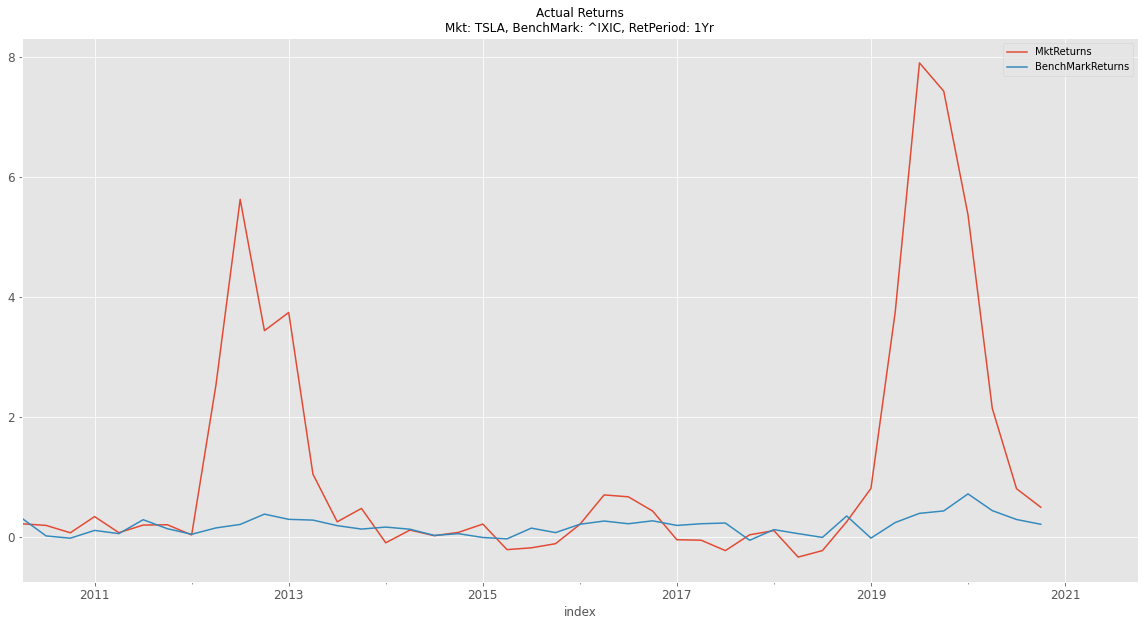

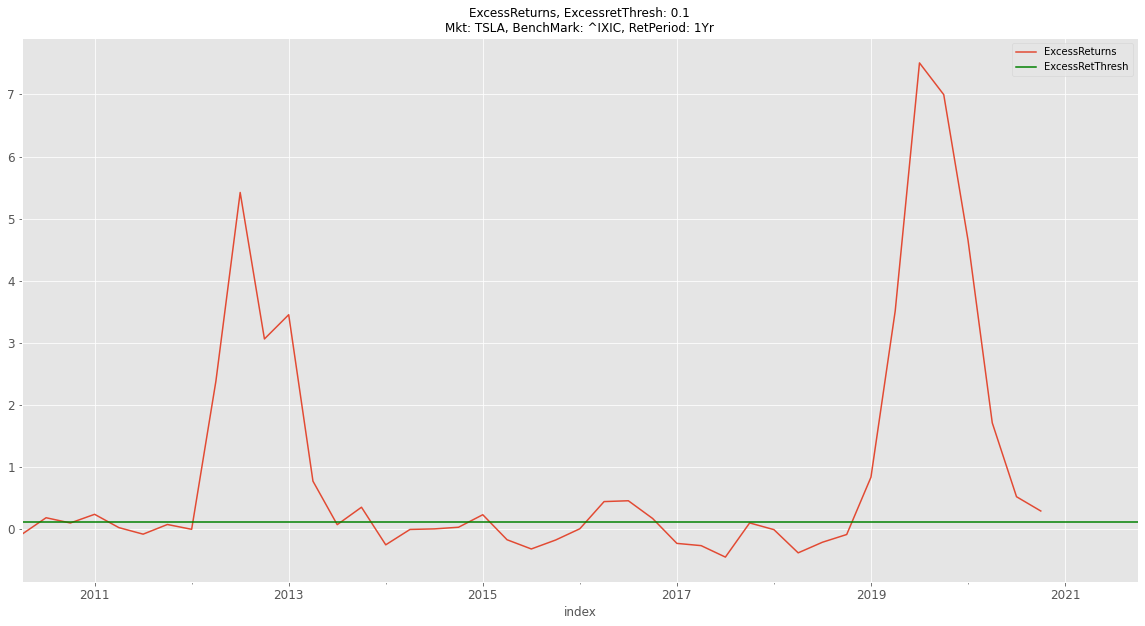

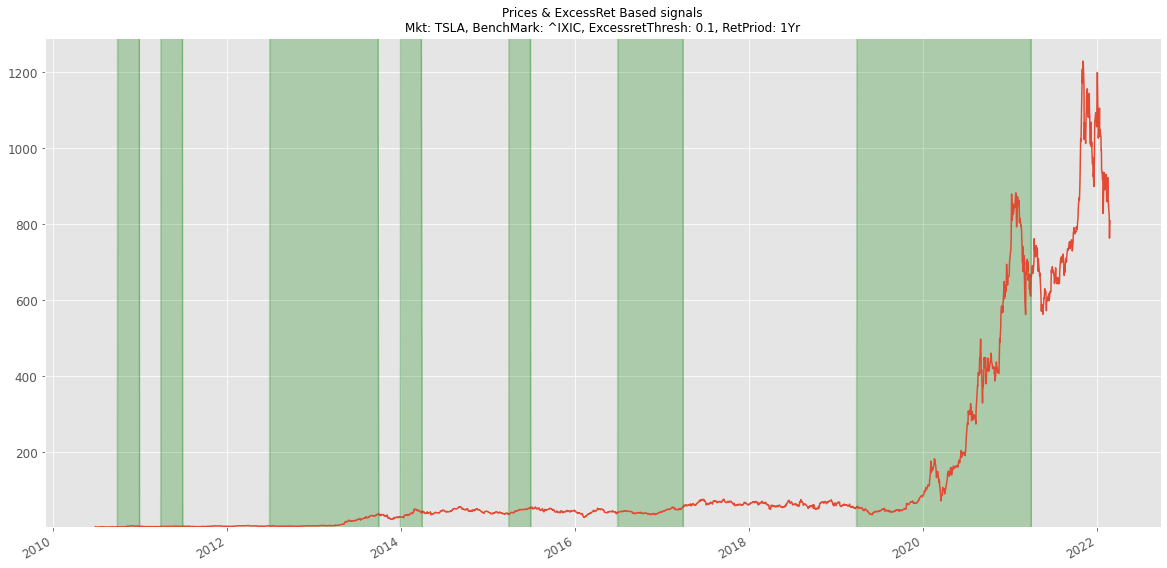

Distribution of the Signals:
0    27
1    20
Name: Signal, dtype: int64


In [ ]:
PlotTargetData(AllMkts_FactorsData,Mkt='TSLA',BenchMarkMkt = '^IXIC',ReturnPeriod = 1,ExcessRetThresh = 0.1)

#### Sample code to Create Indicator & Target data of all Mkts

In [ ]:
import Fundamental_Price_DataFunctions as Dfuncs

In [ ]:
#Sample code to Create Indicator & Target data of all Mkts
ReturnPeriod = 1 #Year
BenchMarkMkt = '^IXIC'
StationarizeByMCap = ['enterpriseValue','workingCapital','tangibleAssetValue',
                      'netCurrentAssetValue','investedCapital','averageReceivables',
                      'averagePayables', 'averageInventory']
StationarizebyPrice = ['revenuePerShare','netIncomePerShare','operatingCashFlowPerShare',
                       'freeCashFlowPerShare','cashPerShare','bookValuePerShare',
                       'tangibleBookValuePerShare','shareholdersEquityPerShare',
                       'interestDebtPerShare','capexPerShare','grahamNumber','grahamNetNet']

nas_100 = pd.read_html('https://en.wikipedia.org/wiki/NASDAQ-100')[3]
NasdaqConstituentList = nas_100['Ticker']
NasdaqConstituentList = NasdaqConstituentList[:5]
#NasdaqConstituentList = NasdaqConstituentList
#AllMktsAllFactorData = pickle.load(open('AllMkts_FactorsData_new.pkl','rb'))
AllMktsAllFactorData = {}

BenchMark_Data = yf.download(BenchMarkMkt)

AllMktsIndicatorData = pd.DataFrame()
AllMktsTargetData = pd.DataFrame()
AllMktsActualReturns = pd.DataFrame()
for Mkt in NasdaqConstituentList:
    print('Mkt: {}, FundamentalData: '.format(Mkt),end='')
    try:
        MktData = AllMktsAllFactorData[Mkt].copy()
    except:
        MktData = Dfuncs.GetMkt_FundamentalData_FMP(Mkt)
        AllMktsAllFactorData[Mkt] = MktData.copy()

    MktPrices = yf.download(Mkt,progress=False)

    if (MktData.empty) | ( MktPrices.empty):
        print('No Data')
        continue

    PricesToStationarize = MktPrices[['Close']].copy()
    PricesToStationarize = pd.concat([PricesToStationarize,MktData[[]]],axis=1)
    PricesToStationarize = PricesToStationarize.fillna(method='ffill')
    PricesToStationarize = PricesToStationarize.loc[MktData.index,:]
    PricesToStationarize.dropna(inplace=True)
    MktData = MktData.loc[PricesToStationarize.index,:]

    MktData[StationarizebyPrice] = MktData[StationarizebyPrice].divide(PricesToStationarize['Close'],axis='index')

    MktData[StationarizeByMCap] = MktData[StationarizeByMCap].divide(MktData['marketCap'],axis='index')
    MktData.drop('marketCap',axis=1,inplace=True)
    MktData = MktData.loc['2006':,:]
    TargetData = MktData[[]].copy()
    MktActualReturns = MktData[[]].copy()
    MktData.reset_index(inplace=True)
    MktData['Mkt'] = Mkt
    MktData.set_index(['index','Mkt'],inplace=True)
    AllMktsIndicatorData = pd.concat([AllMktsIndicatorData,MktData])
    print('Done, TargetData: ',end='')



    MktExcessReturns = []
    MktActualReturnsList = []
    for Date in TargetData.index:
        StartDate = Date
        EndDate = StartDate + relativedelta(years=ReturnPeriod)
        PeriodPrices = MktPrices.loc[StartDate:EndDate,'Adj Close'].copy()

        ExcessReturns = np.nan
        ActualReturns = np.nan
        if (EndDate <= MktPrices.index.max()) & (not PeriodPrices.empty):
            PeriodReturns = (PeriodPrices.iloc[-1] / PeriodPrices.iloc[0]) - 1
            ActualReturns = PeriodReturns

            BenchmarkPrices = BenchMark_Data.loc[StartDate:EndDate,'Adj Close'].copy()
            BenchmarkReturns = (BenchmarkPrices.iloc[-1] / BenchmarkPrices.iloc[0]) - 1

            ExcessReturns = PeriodReturns - BenchmarkReturns
        MktExcessReturns.append(ExcessReturns)
        MktActualReturnsList.append(ActualReturns)

    TargetData['ExcessRet_{}Y'.format(ReturnPeriod)] = MktExcessReturns
    TargetData['Mkt'] = Mkt
    TargetData.reset_index(inplace=True)
    TargetData.set_index(['index','Mkt'],inplace=True)
    AllMktsTargetData = pd.concat([AllMktsTargetData,TargetData])

    MktActualReturns['ActualRet_{}Y'.format(ReturnPeriod)] = MktActualReturnsList
    MktActualReturns['Mkt'] = Mkt
    MktActualReturns.reset_index(inplace=True)
    MktActualReturns.set_index(['index','Mkt'],inplace=True)
    AllMktsActualReturns = pd.concat([AllMktsActualReturns,MktActualReturns])
    print('Done')
#pickle.dump(AllMktsIndicatorData,open('AllMktsIndicatorData.pkl','wb'))
#pickle.dump(AllMktsTargetData,open('AllMktsTargetData.pkl','wb'))
#pickle.dump(AllMktsActualReturns,open('AllMktsActualReturns.pkl','wb'))


[*********************100%***********************]  1 of 1 completed
Mkt: ATVI, FundamentalData: Done, TargetData: Done
Mkt: ADBE, FundamentalData: Done, TargetData: Done
Mkt: ADP, FundamentalData: Done, TargetData: Done
Mkt: ABNB, FundamentalData: Done, TargetData: Done
Mkt: ALGN, FundamentalData: Done, TargetData: Done


In [ ]:
AllMktsIndicatorData = pickle.load(open(os.path.join('SP500_20220223','AllMktsIndicatorData.pkl'),'rb'))
AllMktsTargetData = pickle.load(open(os.path.join('SP500_20220223','AllMktsTargetData.pkl'),'rb'))
AllMktsActualReturns = pickle.load(open(os.path.join('SP500_20220223','AllMktsActualReturns.pkl'),'rb'))
AllMktsIndicatorData = AllMktsIndicatorData.drop('period',axis=1)

In [ ]:
#AllMktsIndicatorData = pickle.load(open('AllMktsIndicatorData.pkl','rb'))
#AllMktsTargetData = pickle.load(open('AllMktsTargetData.pkl','rb'))
#AllMktsActualReturns = pickle.load(open('AllMktsActualReturns.pkl','rb'))

#### Model Building part

In [ ]:
AllMktsIndicatorData.tail()

,,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
index,Mkt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-31,ZTS,0.022962,0.004536,0.009124,0.007294,0.045772,0.047894,-0.008018,0.047894,0.088417,1.047779,55.108718,43.550221,109.603412,137.099739,20.87961,20.87961,45.631018,664.961694,114.840181,143.650261,0.004536,0.007294,1.793049,0.722757,30.322581,3.046544,-0.594059,2.011204,0.001207,0.266106,0.28777,0.073603,0.323609,-0.200557,-0.07969,-1.321101,0.007194,0.069918,0.020981,0.038783,-0.059219,0.056433,-0.008018,-0.040981,0.0,0.013756,0.005362,0.022257,50.453791,68.43594,243.793677,1.78381,1.315098,0.369165,0.09472,-0.00183
2021-03-31,ZTS,0.024986,0.007465,0.005342,0.004313,0.048103,0.054606,-0.003819,0.054606,0.098916,1.050052,33.489149,40.022308,187.204345,231.832006,18.312971,18.312971,42.025515,92.072293,196.574345,243.435722,0.007465,0.004313,1.649792,0.703392,4.388759,3.28848,13.245614,0.715564,0.001589,0.21288,0.0,0.063068,0.317338,-0.1925,-0.041154,-0.706422,0.006948,0.09577,0.064365,0.059354,-0.058869,0.06314,-0.003819,-0.038861,0.0,0.015204,0.004894,0.023871,54.115446,56.721311,278.688525,1.663111,1.586705,0.322941,0.136708,-0.001028
2021-06-30,ZTS,0.022015,0.005786,0.005436,0.004159,0.041341,0.049162,-0.000068,0.049162,0.083631,1.041646,43.204946,45.422859,183.957855,240.444914,20.341087,20.341087,47.314542,114.353261,191.618978,250.458501,0.005786,0.004159,1.549195,0.690667,4.57196,3.370636,12.701754,0.939453,0.001345,0.232422,0.0,0.061602,0.309759,-0.234927,-0.058008,-1.008929,0.008214,0.080003,0.060444,0.052724,-0.048376,0.056022,-0.000068,-0.030164,0.0,0.013121,0.004272,0.020778,54.055441,58.46831,285.528169,1.664957,1.539295,0.315205,0.117701,-0.001277
2021-09-30,ZTS,0.021625,0.005999,0.007096,0.005803,0.035578,0.050846,0.004412,0.050846,0.073982,1.037795,41.676793,46.242392,140.92245,172.326516,19.6671,19.6671,47.99013,115.758012,146.248636,178.839625,0.005999,0.005803,1.443043,0.658446,4.215758,4.542488,13.0,1.182971,0.001293,0.21558,0.0,0.066332,0.31193,-0.182236,-0.059799,-1.081818,0.007538,0.082841,0.059506,0.058537,-0.042908,0.056628,0.004412,-0.02545,0.0,0.012519,0.004205,0.020375,52.100503,59.43686,287.969283,1.727431,1.514212,0.312533,0.117974,-0.001293
2021-12-31,ZTS,0.017005,0.003553,0.00587,0.004418,0.030129,0.039284,0.003354,0.039284,0.058762,1.028166,70.359014,58.805399,170.353784,226.360508,25.455594,25.455594,60.461728,176.189955,175.152017,232.736242,0.003553,0.004418,1.483935,0.673094,4.826667,3.856427,51.074074,1.652068,0.001011,0.284672,0.0,0.070158,0.298993,-0.247423,-0.085409,-1.435897,0.007117,0.056042,0.227877,0.04218,-0.035098,0.044376,0.003354,-0.020973,0.0,0.009877,0.003558,0.016417,51.840366,65.4,288.45,1.736099,1.376147,0.312012,0.090449,-0.001452


In [ ]:
#Creating X & Y for Train & Test
ExcessRetThresh = 0.1

AllMktsTargetData.dropna(inplace=True)
AllMktsIndicatorData = AllMktsIndicatorData.loc[AllMktsTargetData.index,:]

X_Train = AllMktsIndicatorData.copy()
X_Train.reset_index(inplace=True)
X_Train = X_Train.loc[X_Train['index']<='2018']
X_Train.set_index(['index','Mkt'],inplace=True)
X_Train.dropna(inplace=True)

X_Test = AllMktsIndicatorData.copy()
X_Test.reset_index(inplace=True)
X_Test = X_Test.loc[X_Test['index']>'2018']
X_Test.set_index(['index','Mkt'],inplace=True)
X_Test.dropna(inplace=True)

AllMktsTargetData['Signal'] = 0
AllMktsTargetData.loc[AllMktsTargetData['ExcessRet_1Y']>ExcessRetThresh,'Signal'] = 1

Y_Train = AllMktsTargetData.loc[X_Train.index,:].copy()
Y_Test = AllMktsTargetData.loc[X_Test.index,:].copy()

Y_Train.drop('ExcessRet_1Y',axis=1,inplace=True)
Y_Test.drop('ExcessRet_1Y',axis=1,inplace=True)
print('Train IndicatorMatrix: {}'.format(X_Train.shape))
print('Train TargetMatrix: {}'.format(Y_Train.shape))
print('Test IndicatorMatrix: {}'.format(X_Test.shape))
print('Test TargetMatrix: {}'.format(Y_Test.shape))

Train IndicatorMatrix: (5701, 56)
Train TargetMatrix: (5701, 1)
Test IndicatorMatrix: (2253, 56)
Test TargetMatrix: (2253, 1)


In [ ]:
#Scaling the Variables
scaler = StandardScaler()
scaler.fit(X_Train)
X_Train = pd.DataFrame(scaler.transform(X_Train),columns = X_Train.columns,index=X_Train.index)
X_Test = pd.DataFrame(scaler.transform(X_Test),columns = X_Test.columns,index=X_Test.index)
X_Train.drop('investedCapital',axis=1,inplace=True)

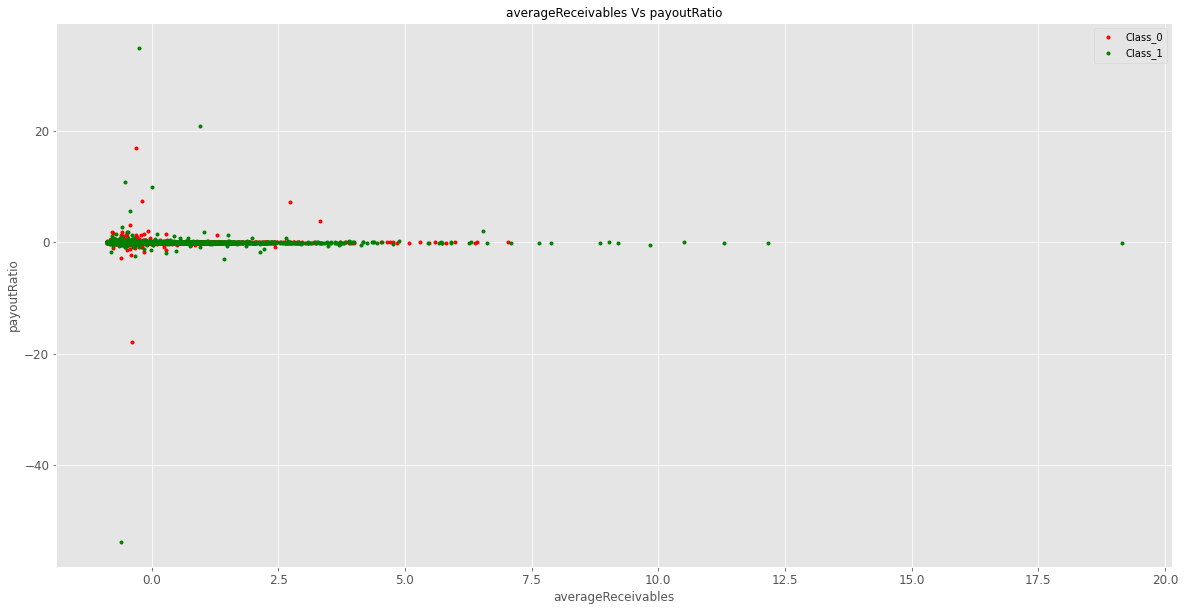

In [ ]:
#2 Variable Analysis
X_Axis = 'averageReceivables'
Y_Axis = 'payoutRatio'
Class_0 = X_Train.loc[Y_Train['Signal']==0,[X_Axis,Y_Axis]].copy()
Class_1 = X_Train.loc[Y_Train['Signal']==1,[X_Axis,Y_Axis]].copy()

fig = plt.figure()
ax1 = fig.add_subplot(111)

Class_0.set_index(X_Axis).plot(style='.',color='red',ax=ax1)
Class_1.set_index(X_Axis).plot(style='.',color='green',ax=ax1)

plt.xlabel(X_Axis)
plt.ylabel(Y_Axis)
plt.legend(['Class_0','Class_1'])
plt.title('{} Vs {}'.format(X_Axis,Y_Axis))
plt.show()

In [ ]:
from boruta import BorutaPy
# define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X_Train,Y_Train['Signal'])
# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)
# find all relevant features
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=1, random_state=1,
                         max_iter=10)
feat_selector.fit(np.array(X_Train),np.array(Y_Train['Signal']))
ShuffledImpVals = pd.DataFrame({'Rank':feat_selector.ranking_},index=X_Train.columns)
ShuffledImpVals = ShuffledImpVals.loc[ShuffledImpVals['Rank']==1,:]

Iteration: 1 / 10
Iteration: 2 / 10
Iteration: 3 / 10
Iteration: 4 / 10
Iteration: 5 / 10
Iteration: 6 / 10
Iteration: 7 / 10
Iteration: 8 / 10
Iteration: 9 / 10


BorutaPy finished running.

Iteration: 	10 / 10
Confirmed: 	30
Tentative: 	12
Rejected: 	10


In [ ]:
ShuffledImpVals.index

Index(['revenuePerShare', 'freeCashFlowPerShare', 'cashPerShare',
       'bookValuePerShare', 'shareholdersEquityPerShare', 'priceToSalesRatio',
       'pfcfRatio', 'evToSales', 'evToOperatingCashFlow', 'evToFreeCashFlow',
       'freeCashFlowYield', 'debtToAssets', 'currentRatio', 'dividendYield',
       'payoutRatio', 'capexToOperatingCashFlow', 'capexToRevenue',
       'capexToDepreciation', 'stockBasedCompensationToRevenue',
       'grahamNetNet', 'workingCapital', 'netCurrentAssetValue',
       'averageReceivables', 'averagePayables', 'averageInventory',
       'daysSalesOutstanding', 'daysPayablesOutstanding',
       'receivablesTurnover', 'payablesTurnover', 'capexPerShare'],
      dtype='object')

In [ ]:
X_Train = X_Train.loc[:,ShuffledImpVals.index]
X_Test = X_Test.loc[:,ShuffledImpVals.index]

In [ ]:
#Model building
model = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=250, n_jobs=-1, oob_score=False,
                       random_state=1324, verbose=0, warm_start=False)
model.fit(X_Train,Y_Train['Signal'])


#TrainData = pd.concat([X_Train,Y_Train],axis=1)
#clf1 = classification.setup(data = TrainData, target = 'Signal',silent = True)
#rf = classification.create_model('rf', fold = 5)
#model = classification.tune_model(rf)
#model.fit(X_Train,Y_Train['Signal'])


RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       max_depth=10, max_features='log2',
                       min_impurity_decrease=0.0002, min_samples_leaf=3,
                       n_estimators=250, n_jobs=-1, random_state=1324)

In [ ]:
#Train and test predictions
TrainPreds = pd.DataFrame(model.predict(X_Train),index=Y_Train.index,columns=Y_Train.columns)
TestPreds = pd.DataFrame(model.predict(X_Test),index=Y_Test.index,columns=Y_Test.columns)

In [ ]:
#Classification Summary
print('Train Classification Report')
print(classification_report(Y_Train['Signal'],TrainPreds['Signal']))
print('Test Classification Report')
print(classification_report(Y_Test['Signal'],TestPreds['Signal']))

Train Classification Report
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3457
           1       0.89      0.86      0.87      2244

    accuracy                           0.90      5701
   macro avg       0.90      0.89      0.90      5701
weighted avg       0.90      0.90      0.90      5701

Test Classification Report
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      1481
           1       0.43      0.35      0.39       772

    accuracy                           0.62      2253
   macro avg       0.56      0.55      0.55      2253
weighted avg       0.60      0.62      0.61      2253



In [ ]:
#TestPreds = TestPreds.reset_index()
#TestPreds = TestPreds.loc[TestPreds['index']<'2020',:]
#TestPreds.set_index(['index','Mkt'],inplace=True)

Mean All Test Returns: 0.201
Mean PositiveSignal ML Test Returns: 0.301


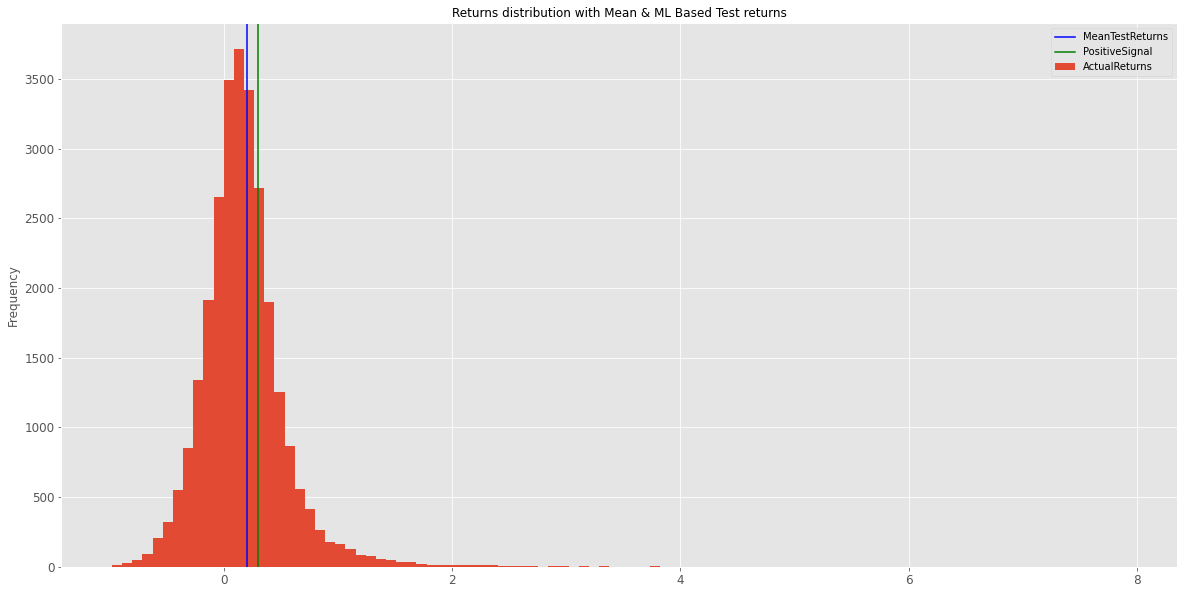

In [ ]:
MeanTestReturns = AllMktsActualReturns.loc[TestPreds.index,:].mean()
PosTestPredReturns = AllMktsActualReturns.loc[TestPreds.loc[TestPreds['Signal']==1].index,:].mean()

print('Mean All Test Returns: {}'.format(round(MeanTestReturns[0],3)))
print('Mean PositiveSignal ML Test Returns: {}'.format(round(PosTestPredReturns[0],3)))

AllMktsActualReturns['ActualRet_1Y'].plot(kind='hist',bins=100)
plt.axvline(MeanTestReturns.values[0],color='blue')
plt.axvline(PosTestPredReturns.values[0],color='green')
plt.legend(['MeanTestReturns','PositiveSignal','ActualReturns'])
plt.title('Returns distribution with Mean & ML Based Test returns')
plt.show()

In [ ]:
TestPreds

,,Signal
index,Mkt,
2018-03-31,MMM,0
2018-06-30,MMM,0
2018-09-30,MMM,0
2018-12-31,MMM,0
2019-03-31,MMM,0
...,...,...
2019-12-31,ZTS,0
2020-03-31,ZTS,0
2020-06-30,ZTS,0
